In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


loaded 1 files
loaded 1 files
loaded 1 files
loaded 1 files
loaded 1 files
[1, 2, 'Ot', 2]
[[0, 1]]


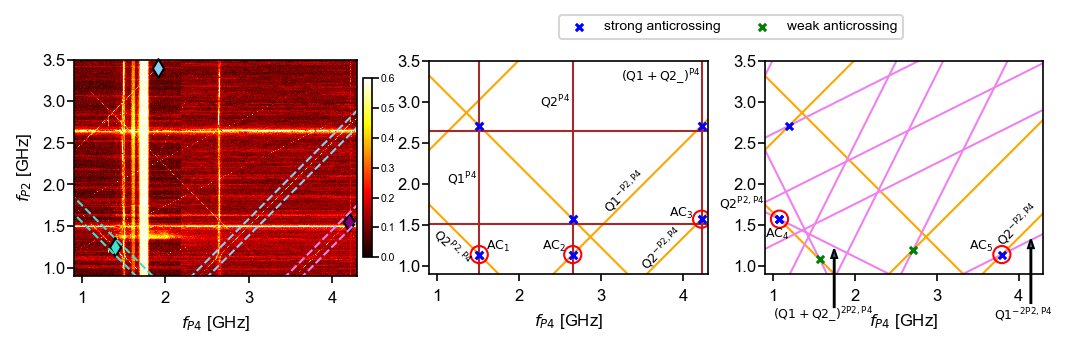

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MaxNLocator
import pickle
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import sys
import os
from utils.notebook_tools import get_data_from
import pickle

fig_size_single = 3.37
fig_size_double = 6.69

#%% defining style
plt.rcParams.update({'font.size': 8})
plt.rcParams['font.sans-serif']= 'Arial'
plt.rcParams["figure.figsize"] = (fig_size_single, 3)  #it should be 3 
plt.rcParams['figure.dpi'] = 150
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.default'] = 'it' #'regular'

plt.rcParams['legend.frameon']= True
plt.rcParams['legend.fontsize']= 'small'
plt.rcParams['legend.scatterpoints']= 1
plt.rcParams['axes.labelpad'] = 4 #-2


fq1=1.514  #resonance frequencies at (-10,10) mV point
fq1b=1.570
fq2=2.655
fq2b=2.714

script_dir = os.path.dirname() #<-- absolute dir the script is in
sys.path.append(script_dir)
save_path = os.path.join(script_dir, 'Figures')

start_time = '2022-07-12\\17-59-02'

end_time = start_time #'2021-06-24\\18-03-01' #'2021-06-10\\18-32-47'
datadir = os.path.join(script_dir, 'measurements')
datfiles, fnames = get_data_from(start_time, end_time, num = 1, rootfolder=datadir, only_complete = False) 
datfile = datfiles[0]

start_time2 = '2022-07-13\\17-27-20'

end_time2 = start_time2 #'2021-06-24\\18-03-01' #'2021-06-10\\18-32-47'
datfiles2, fnames2 = get_data_from(start_time2, end_time2, num = 1, rootfolder=datadir, only_complete = False) 
datfile2 = datfiles2[0]

start_time_rabi_q1dif = '2022-07-13\\15-56-21' # '2022-07-13\\15-26-45' # 
start_time_rabi_q2dif = '2022-07-13\\14-27-14'
start_time_rabi_q2sum = '2022-07-13\\14-51-17'

start_time_rabi_list = [start_time_rabi_q1dif, start_time_rabi_q2dif, start_time_rabi_q2sum]
mixing_regime = ['difference', 'difference', 'sum']
fp4_fp2 = [(2.6, 1.10064), (4.2, 1.5539), (1.4, 1.2472)]

datfile_rabi = {}

for start_time_rabi in start_time_rabi_list:
    end_time = start_time_rabi #'2021-06-24\\18-03-01' #'2021-06-10\\18-32-47'
    datfiles, fnames = get_data_from(start_time_rabi, end_time, num = 1, rootfolder=datadir, only_complete = False) 
    datfile_rabi[start_time_rabi] = datfiles

    
#%% Calibrated Rabi frequencies
with open(os.path.join(script_dir, 'measurements\config_freq_rabi.txt'), "rb") as file:
    config_freq_rabi = pickle.load(file)

vP1 = -10
vP2 = 10
P2_pwr = -5
P4_pwr = 3

try:
    fq2p2 = config_freq_rabi['P2'][P2_pwr]['fq2'][(vP1,vP2)]
    fq2 = fq2p2/1e9
    fq2_p2 = config_freq_rabi['P2'][P2_pwr]['fq2_'][(vP1,vP2)]
    fq2_ = fq2_p2/1e9
    fq1p4 = config_freq_rabi['P4'][P4_pwr]['fq1'][(vP1,vP2)]
    fq1 = fq1p4/1e9
except:
    print('Could not find calibrated data in database')
    fq1 = 1.51e9/1e9
    fq2 = 2.66e9/1e9

mixing_regime = 'difference'
fq = fq1
#%% Plotting
figure_size = 'small'

#figsize = {'big':(1.0*fig_size_double,1.0*fig_size_double/3), 'small':(1.0*fig_size_double ,1.0*fig_size_double/3)}

P2_frequency = datfile.sig_gen3_frequency_set.ndarray/1e9
P4_frequency = datfile.sig_gen2_frequency_set.ndarray[0,:]/1e9
P2_frequency2 = datfile2.sig_gen3_frequency_set.ndarray/1e9
P4_frequency2 = datfile2.sig_gen2_frequency_set.ndarray[0,:]/1e9

linestyles = ['-', ':', '--', '-.']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


#fig = plt.figure(figsize=(1.35*fig_size_double, 1.3*fig_size_double/3))
fig = plt.figure(figsize=(1.05*fig_size_double, 0.8*1.05*fig_size_double/3))
#originally 1.05 

gs1 = GridSpec(nrows=1, ncols=3,width_ratios=[1.07,1,1],hspace=0.3)


ax1 = fig.add_subplot(gs1[0,0])
ax2 = fig.add_subplot(gs1[0,1])
ax3= fig.add_subplot(gs1[0,2])


vmin = 0
vmax = 0.6
cm = ax1.pcolor(P4_frequency, P2_frequency, datfile.su0-datfile.su0.min(), shading='auto', cmap='hot', zorder=1, vmin=vmin, vmax=vmax)
ax1.pcolor(P4_frequency2, P2_frequency2[0:-90], datfile2.su0[0:-90]-datfile2.su0[0:-90].min(), shading='auto', cmap='hot', zorder=1, vmin=vmin, vmax=vmax)

ax1.set_ylabel(r'$f_{P2}$ [GHz]',fontsize=8)
ax1.set_xlabel(r'$f_{P4}$ [GHz]',fontsize=8)

ax1.set_ylim(bottom=0)
ax1.set_xlim(left=0)

ymin, ymax = ax1.get_ylim()
xmin, xmax = ax1.get_xlim()
ymax = 4.3e9
xmax = 4.3e9
lw = 1

if figure_size == 'big':
    show_1tone = True
    show_2tone_dif = True
    show_2tone_sum = True
    show_2tone_harmonic = True
else:
    show_1tone = True
    show_2tone_dif = True
    show_2tone_sum = True
    show_2tone_harmonic = False

if show_1tone:
    ax1.hlines(fq1, xmin, xmax, lw = lw, ls=linestyles[0], color='black', label = 'fq1 = fp4 or fq1 = fp2', zorder=0)
    ax1.hlines(fq2, xmin, xmax, lw = lw, ls=linestyles[0], color='navy', label = 'fq2 = fp4 or fq2 = fp2', zorder=0)
    
    ax1.vlines(fq1, ymin, ymax, lw = lw, ls=linestyles[0], color='black', zorder=0)
    ax1.vlines(fq2, ymin, ymax, lw = lw, ls=linestyles[0], color='navy', zorder=0)
    
    ax1.vlines(fq2/2, ymin, ymax, lw = lw, ls=linestyles[1], color='navy', label = 'fq2/2 = fp2', zorder=0)


if show_2tone_dif:
    # differences
    ax1.plot([fq1,xmax],[0,xmax-fq1], lw = lw, ls=linestyles[2], color=colors[0], label = 'fq1 = |fp4 - fp2|', zorder=0)
    ax1.plot([fq2,xmax],[0,xmax-fq2], lw = lw, ls=linestyles[2], color=colors[1], label = 'fq2 = |fp4 - fp2|', zorder=0)
    
    ax1.plot([0,ymax-fq1], [fq1,ymax], lw = lw, ls=linestyles[2], color=colors[0], zorder=0)
    ax1.plot([0,ymax-fq2], [fq2,ymax], lw = lw, ls=linestyles[2], color=colors[1], zorder=0)


if show_2tone_sum:
    # sum
    # ax1.plot([0,fq1], [fq1,0], lw = lw, ls=linestyles[2], color=colors[2], label = 'fq1 = fp4 + fp2', zorder=0)
    ax1.plot([0,fq1+fq2_], [fq1+fq2_,0], lw = lw, ls=linestyles[1], color=colors[2], label = 'fq1 + fq2 = fp4 + fp2', zorder=0)
    ax1.plot([0,fq2], [fq2,0], lw = lw, ls=linestyles[2], color=colors[2], label = 'fq2 = fp4 + fp2', zorder=0)


if show_2tone_harmonic:
    ax1.plot([0,2*fq1],[fq1/2,5/2*fq1], lw = lw, ls=linestyles[1], color=colors[5], label = 'fq1 = 2*(fp4 - fp2)', zorder=0)
    
    ax1.plot([0,fq1],[fq1/2,fq1], lw = lw, ls=linestyles[3], color=colors[3], label = 'fq1 = 2*fp4 + fp2', zorder=0)
    ax1.plot([0,4*fq1],[-fq1/2,3/2*fq1], lw = lw, ls=linestyles[3], color=colors[3], label = 'fq1 = -2*fp4 + fp2', zorder=0)
      
    ax1.plot([0,fq1],[-fq1,fq1], lw = lw, ls=linestyles[2], color=colors[3], label = 'fq1 = 2*fp2 + fp4', zorder=0)
    
    ax1.plot([0,fq2],[(fq1+fq2)/2,(fq1+2*fq2)/2], lw = lw, ls=linestyles[1], color=colors[5], label = 'fq1 + fq2 = 2*fp4 + fp2', zorder=0)
    
    ax1.plot([0,fq1],[fq1/3,2/3*fq1], lw = lw, ls=linestyles[1], color=colors[3], label = 'fq1 = 3*fp4 + fp2', zorder=0)
    
    # ax1.plot([0,2*fq1],[fq1/4,5/4*fq1], lw = lw, ls=linestyles[3], color=colors[3], label = 'fq1 = 2*fp4 + fp2', zorder=0)
    
    ax1.plot([0,fq2],[fq2/2,fq2], lw = lw, ls=linestyles[3], color=colors[4], label = 'fq2 = 2*fp4 + fp2', zorder=0)
    ax1.plot([0,fq2],[-fq2,fq2], lw = lw, ls=linestyles[2], color=colors[4], label = 'fq2 = 2*fp2 + fp4', zorder=0)
    

colors = ['lightskyblue', 'purple', 'turquoise']
n = 0
for start_time_rabi in start_time_rabi_list:
    fp4 = np.round(datfile_rabi[start_time_rabi][0].metadata['station']['instruments']['sig_gen2']['parameters']['frequency']['value']/1e9, 3)
    fp2 = np.round(datfile_rabi[start_time_rabi][0].metadata['station']['instruments']['sig_gen3']['parameters']['frequency']['value']/1e9, 3)
    ax1.scatter([fp4],[fp2], s=40, zorder=1, marker='d', color=colors[n], edgecolors='black', clip_on=False)
    n = n + 1


ax1.axis('square')
ax1.set_ylim(0.9,3.5)
ax1.set_xlim(0.9,4.3)

ax1.plot([-100e-3,fq2-100e-3], [fq2,0], lw = 1, ls=linestyles[2], color='turquoise', zorder=2)
ax1.plot([+100e-3,fq2+100e-3], [fq2,0], lw = 1, ls=linestyles[2], color='turquoise', zorder=2)
ax1.plot([fq2-100e-3,2*fq2-100e-3], [0,fq2], lw = 1, ls=linestyles[2], color='violet', zorder=2)
ax1.plot([fq2+100e-3,2*fq2+100e-3], [0,fq2], lw = 1, ls=linestyles[2], color='violet', zorder=2)
ax1.plot([fq1-100e-3,4*fq1-100e-3], [0,3*fq1], lw = 1, ls=linestyles[2], color='lightskyblue', zorder=2)
ax1.plot([fq1+100e-3,4*fq1+100e-3], [0,3*fq1], lw = 1, ls=linestyles[2], color='lightskyblue', zorder=2)

cbar = fig.colorbar(cm, fraction=0.03, pad=0.02,ax=ax1)
cbar.ax.tick_params(labelsize=5,pad=0.5)
# cbar.set_label(r'$1-P_{\downdownarrows}$')

Q1=1.514  #transition frequencies
Q1b=1.570
Q2=2.655
Q2b=2.714

def mono(P,f):         #P is either 2 or 4, f can be Q1, Q2 or Q1+Q2b
    if P==2:  #if plunger P2 is used
        y=f  #the fp2 is constant 
        x0=0
        x=5
        ax2.plot([x0,x],[y,y],color='brown',linewidth=1)  #plots the monochromatic resonance line
        if f==Q1:
            char=r'$\mathrm{Q1^{P2}}$'
        if f==Q2:
            char=r'$\mathrm{Q2^{P2}}$'
        if f==Q1+Q2b:
            char=r'$\mathrm{(Q1+Q2\_)^{P2}}$'
        #if f==Q1+Q2b:
        #if f==Q1:
            #text(3.55,y+0.05,char)  #label of the transition
    else:       #if plunger P4 is used
        x=f
        y0=0
        y=5
        ax2.plot([x,x],[y0,y],color='brown',linewidth=1)
        if f==Q1:
            char=r'$\mathrm{Q1^{P4}}$'
        if f==Q2:
            char=r'$\mathrm{Q2^{P4}}$'
        if f==Q1+Q2b:
            char=r'$\mathrm{(Q1+Q2\_)^{P4}}$'
            
def fp2(C2,C4,f,x):
    return f/C2-x*C4/C2  #calculates the equation of the resonance line

def fp4(C2,C4,f,y):
    return f/C4-y*C2/C4

def bichro(C2,C4,i):   #c2*fp2+c4*fp4=Q_i, Q1, Q2 and Q1+Q2_ are the three frequencies
    if i==1:
        f=Q1
    if i==2:
        f=Q2
    if i==3:
        f=Q1+Q2b
    I=array([0,5])
    ax2.plot(I,fp2(C2,C4,f,I),color='orange',zorder=1,linewidth=1) #plot of the resonance line

    charP2='P2'
    charP4='P4'
    
    charQ='Q2'
    
    if i==1:
        charQ='Q1'
    if i==2:
        charQ='Q2'
    if i==3:
        charQ='(Q1+Q2\_)'
    if C2==1:
        charP2='P2'
    if C2==-1:
        charP2='-P2'
    if C4==1:
        charP4='P4'
    if C4==-1:
        charP4='-P4'
    
    char2='$\mathrm{'+charQ+'^'+'{'+charP2+','+charP4+'}}$'
    
            
def Q(i):    #function that returns the Q as a function of an index 
    q=0
    if i==1:
        q=Q1
    if i==2:
        q=Q2
    if i==3:
        q=Q1+Q2b
    return q

def intersection_mono_bi(mono,bi):    
    #mono has two elements, first is 2 or 4, which tells us if it is driven by P2 or P4, second is Qi
    #bihas three elements, C2, C4 and Qj
    x=0
    y=0
    Qi=Q(mono[1])
    Qj=Q(bi[2])
    C2=bi[0]
    C4=bi[1]
    if mono[0]==2:
        y=Qi
        x=(Qj-C2*y)/C4
    if mono[0]==4:
        x=Qi
        y=(Qj-C4*x)/C2
    return [x,y]   #intersection point of a monochromatic with a bichromatic 

import matplotlib.lines as mlines


def Q(i):    #function that returns the Q as a function of an index 
    q=0
    if i==1:
        q=Q1
    if i==2:
        q=Q2
    if i==3:
        q=Q1+Q2b
    return q

mono(2,Q1)      #plotting the monochromatic transitions
mono(2,Q2)
mono(2,Q1+Q2b)

mono(4,Q1)
mono(4,Q2)
mono(4,Q1+Q2b)

bichro(1,1,1)    #plotting the bichromatic transitions
bichro(1,1,2)
bichro(1,1,3)

bichro(-1,1,1)
bichro(-1,1,2)
bichro(-1,1,3)

bichro(1,-1,1)
bichro(1,-1,2)
bichro(1,-1,3)


mon4=[[0,1,1],[0,1,2],[0,1,3]]   #monochromatic transitions, C2*P2+C4*P4=Q_i, driven by P4 or P2
mon2=[[1,0,1],[1,0,2],[1,0,3]]

bikro=[[1,1,1],[1,1,2],[1,1,3],[1,-1,1],[1,-1,2],[1,-1,3],[-1,1,1],[-1,1,2],[-1,1,3]]  #similar to the monochromatic transitions

bichro_sum=[[1,1,1],[1,1,2],[1,1,3]]        #bichromatic, when the sum of the frequencies is resonant 
bichro_diff=[[1,-1,1],[1,-1,2],[1,-1,3],[-1,1,1],[-1,1,2],[-1,1,3]]   #bichromatic, when the difference is resonant 

#circles around the analysed anticrossings

x=(Q(2)-1*Q(1))/1    #intersection point of a monochromatic driven by P2 and a bichromatic 
y=Q(1)
ax2.scatter(y,x,s=68,marker='o',facecolors='none',edgecolors='red',zorder=2,) #draw circles around the analysed anticrossings

x=(Q(1)-1*Q(2))/(-1)    #intersection point of a monochromatic driven by P2 and a bichromatic 
y=Q(2)
ax2.scatter(y,x,s=68,marker='o',facecolors='none',edgecolors='red',zorder=2,)

x=(Q(2)-1*Q(3))/(-1)    #intersection point of a monochromatic driven by P2 and a bichromatic 
y=Q(3)
ax2.scatter(y,x,s=68,marker='o',facecolors='none',edgecolors='red',zorder=2,)

m=20*2/3 #markersize

for i in bichro_sum:       #intersection of a bichromatic with sum and a bichromatic with diff 
    for j in bichro_diff:
        C21=i[0]
        C41=i[1]
        Qi=Q(i[2])
        
        C22=j[0]
        C42=j[1]
        Qj=Q(j[2])
        
        x=(Qj-C22*Qi/C21)/(C42-C41*C22/C21)  #calculates the intersection point
        y=(Qj-C42*x)/C22
        #mlines.Line2D([x,x],[y,y],marker='*',color='green',linestyle='None',markersize=10)  

for j in mon4:
    for i in bikro:
        x=(Q(i[2])-i[0]*Q(j[2]))/i[1]   #intersection point of a monochromatic driven by P4 and a bichromatic 
        y=Q(j[2])
        #plot([x],[y],marker='x',color='black',markersize=4)
        #ax1.scatter(x,y,s=m,marker='x',color='black',zorder=2)
        
for j in mon2:
    for i in bikro:
        x=(Q(i[2])-i[1]*Q(j[2]))/i[0]     #intersection point of a monochromatic driven by P2 and a bichromatic 
        y=Q(j[2])
        if i[1]==1:
            #plot([y],[x],marker='x',color='red',markersize=4)
            ax2.scatter(y,x,s=m,marker='x',color='blue',zorder=2)
        #else:
            #plot([y],[x],marker='x',color='black',markersize=4)
        #    ax1.scatter(y,x,s=m,marker='x',color='black',zorder=2)

twophoton2=[1,2,3]
twophoton4=[1,2,3]

mon4=[1,2,3]
mon2=[1,2,3]
        
#putting legends 
#scatter(Q(1),Q(2),s=m,marker='x',color='black',zorder=2,label='crossing')       

x=(Q(3)-1*Q(1))/1    #intersection point of a monochromatic driven by P2 and a bichromatic 
y=Q(1)
#ax1.scatter(y,x,s=m,marker='x',color='blue',zorder=2,label='strong anticrossing, size$\sim$$\Omega t$')  #we put labels 

x=intersection_mono_bi([4,1],[1,1,2])[0]
y=intersection_mono_bi([4,1],[1,1,2])[1] 
#ax1.scatter(x,y,s=m,marker='x',color='purple',zorder=3,label='strong anticrossing, size$\sim$$t^2$')    #labels 

x=intersection_mono_bi([4,1],[1,-1,1])[0]
y=intersection_mono_bi([4,1],[1,-1,1])[1]
#ax1.scatter(x,y,s=m,marker='x',color='black',label='crossing',zorder=3)    #labels 

C21=-1
C41=1
Qi=Q(1)
        
C22=1
C42=1
Qj=Q(3)
        
x=(Qj-C22*Qi/C21)/(C42-C41*C22/C21)
y=(Qj-C42*x)/C22
#scatter(x,y,s=m,marker='x',color='green',zorder=2,label='weak anticrossing') #2nd order anticrossing, when just 
#two photon processes are competing 

ax2.set_xlabel(r'$f_{P4}$ [GHz]',fontsize=8)
#ax1.set_ylabel(r'$f_{P2}$ [GHz]')

ax2.text(1.12,2,r'$\mathrm{Q1^{P4}}$',fontsize=9*2/3)
ax2.text(0.9,1.0,r'$\mathrm{Q2^{P2,P4}}$',fontsize=9*2/3,rotation=-45)
ax2.text(2.25,2.95,r'$\mathrm{Q2^{P4}}$',fontsize=9*2/3)
ax2.text(3.0,1.65,r'$\mathrm{Q1^{-P2,P4}}$',fontsize=9*2/3,rotation=45)

ax2.text(3.25,3.25,r'$\mathrm{(Q1+Q2\_)^{P4}}$',fontsize=9*2/3)
ax2.text(3.45,0.95,r'$\mathrm{Q2^{-P2,P4}}$',fontsize=9*2/3,rotation=45)
#ax2.arrow(3.3, 1.16, 0.25, -0.08,
#          head_width = 0.07,
#          width = 0.01,
#          ec ='black')


def dominates(trans1,trans2): #decides if transition 1 dominates transition 2
    t=0          #t is a logical value, which tells us if trans1 dominates trans2
    
    a=trans1[0]  #a*fp2+b*fp4=Qi, similarly for c and d
    b=trans1[1]
    
    c=trans2[0]
    d=trans2[1]
    
    ph_nr1=abs(a)+abs(b)   #photon number of a process 
    ph_nr2=abs(c)+abs(d)
    
    if ph_nr1<ph_nr2:      #if it is a process, with less pohoton numbers, then it dominates 
        t=1
    
    if ph_nr1==ph_nr2:     #if it has the same number of photons, but contains more ep2, then it dominates
        if abs(a)>abs(c):
            t=1
    return t

def anticrossing(trans1,trans2):   #this function tells us if two transitions cross or not, it will give an answer only if the 
    C21=trans1[0]                  #two transition lines intersect at some point 
    C41=trans1[1]                  #trans1 has form [C21,C41,Qi], trans2 [C22,C42,Qj]
    Qi=trans1[2]
    
    anti=0        #if it is anticrossing 
    order=0       #the order of the anticrossing 
    hop=''        #if it is a 1st order anticrossing, then it tells us which hopping parameters are contributing 
    ep=0          #it is 2, if the 1st order anticrossing is mediated by ep2, it is 4, if it is mediated by ep4
    
    C22=trans2[0]
    C42=trans2[1]
    Qj=trans2[2]
    
    ph_nr1=abs(C21)+abs(C41)     #calculate photon numbers 
    ph_nr2=abs(C22)+abs(C42)
    
    ph_nr_diff=abs(C22-C21)+abs(C42-C41)  #and we also calculate photon number differences 
    
    if dominates([C22-C21,C42-C41],[C21,C41]) and dominates([C22-C21,C42-C41],[C22,C42]): #if the difference dominates both
        anti=1                                                                            #then it is an anticrossings
        order=ph_nr_diff                                                                  #order is the photon number difference
    if Qi==Qj:       #if both processes drive the same transition, then it is not an anticrossing
        anti=0
        order=0
    if order==1:             #if we have a 1st order anticrossing
        if abs(C22-C21)==1:  #if the ep2 photon number is 1, then it is mediated by ep2   
            ep=2
        if abs(C42-C41)==1:  #similarly to ep4
            ep=4
    if order==2:             #if the order is 2, then lets look at the photon number 
        if abs(C22-C21)==2:
            ep=2
        if abs(C42-C41)==2:
            ep=4
    if anti==1:              #this chooses the hopping parameters 
        if Qi!=Qj:
            if Qi+Qj==3:
                hop='t2'
            if Qi+Qj==4:
                hop='Ot'
            if Qi+Qj==5:
                hop='Ot'
    return [anti,order,hop,ep]    #return if it is anticrossing, the order, the hopping parameters and the ep2 or ep4

print(anticrossing([1,1,2],[-1,1,3]))

def intersection(trans1,trans2):  #calculates the intersection point of two transitions (both are at least bichromatic)
    C21=trans1[0]                 #trans1 has the form [C21,C41,Qi], trans2 [C22,C42,Qj], Qi 1,2 or 3
    C41=trans1[1]
    Qi=Q(trans1[2])               #we calculate the actual Qi value using the function Q()
    
    C22=trans2[0]
    C42=trans2[1]
    Qj=Q(trans2[2])
    
    x=(C22*Qi-C21*Qj)/(C41*C22-C42*C21)   #calculates the intersection points
    y=(C42*Qi-C41*Qj)/(C21*C42-C22*C41)
    return [x,y]

trikro_l=[[1,2],[2,1],[-1,2],[2,-1],[1,-2],[-2,1]]  #these are the trichromatic processes, without the specification of Qi
trikro_l=array(trikro_l)
trikro=[]
for i in trikro_l:
    for j in range(1,4):
        cucc=[]
        cucc=i
        cucc=append(cucc,j)
        #print(cucc)
        trikro.append(cucc)  #this adds the Qi term, so we will get 18 transitions, every element of trikro_l will have 3 
                             #different Qi values 

def bichro2(C2,C4,i):   #c2*fp2+c4*fp4=Q_i, Q1, Q2 and Q1+Q2_ are the three frequencies
    if i==1:            #just slightly redefine the function used before for bichromatic transitions 
        f=Q1
    if i==2:
        f=Q2
    if i==3:
        f=Q1+Q2b
    I=array([0,5])
    ax3.plot(I,fp2(C2,C4,f,I),color='orange',zorder=1,linewidth=1) #plot of the resonance line

    charP2='P2'
    charP4='P4'
    
    charQ='Q2'
    
    if i==1:
        charQ='Q1'
    if i==2:
        charQ='Q2'
    if i==3:
        charQ='(Q1+Q2\_)'
    if C2==1:
        charP2='P2'
    if C2==-1:
        charP2='-P2'
    if C4==1:
        charP4='P4'
    if C4==-1:
        charP4='-P4'
    
    char2='$\mathrm{'+charQ+'^'+'{'+charP2+','+charP4+'}}$'      
        
def trichro(line):  #line has the form [C2,C4,Qi], Qi has value 1,2 or 3
    C2=line[0]
    C4=line[1]
    Qi=Q(line[2])   #we calculate the actual Qi value
    
    I=array([0,5])  #the interval of plotting
    I=array([0,5])
    y=(Qi-C4*I)/C2  #y interval
    ax3.plot(I,y,color='violet',zorder=1,linewidth=1) #plot of the resonance line
    global kar  
    global kar1  #these are the strings that will give the label of the resonance line, kar1 the Q
    global kar2  #kar2 the P2
    global kar4  #kar4 the P4
    kar1=''
    kar2=''
    kar4=''
    if C2==-2*C4:
        if Qi==Q1:
            kar1=r'$\mathrm{Q1^'
        if Qi==Q2:
            kar1=r'$\mathrm{Q2^'
        if Qi==Q1+Q2b:
            kar1=r'$\mathrm{(Q1+Q2\_)^'
        if C2==2:
            kar2='{2P2,'
        if C2==-2:
            kar2='{-2P2,'
        if C4==1:
            kar4='P4}}$'
        if C4==-1:
            kar4='-P4}}$'
        kar=kar1+kar2+kar4
        #if y[1]>=1 and y[1]<=5: 
        #    text(5,y[1],kar)  #it also plots the label 
    
    if C4==-2*C2:
        if Qi==Q1:
            kar1=r'$\mathrm{Q1^'
        if Qi==Q2:
            kar1=r'$\mathrm{Q2^'
        if Qi==Q1+Q2b:
            kar1=r'$\mathrm{(Q1+Q2\_)^'
        if C2==1:
            kar2='{P2,'
        if C2==-1:
            kar2='{-P2,'
        if C4==2:
            kar4='2P4}}$'
        if C4==-2:
            kar4='-2P4}}$'
        kar=kar1+kar2+kar4
        X=(Qi-5*C2)/C4-0.1
        #if X>=1 and X<=5 and Qi==Q1+Q2b: 
    if C4==2*C2:
        if Qi==Q1:
            kar1=r'$\mathrm{Q1^'
        if Qi==Q2:
            kar1=r'$\mathrm{Q2^'
        if Qi==Q1+Q2b:
            kar1=r'$\mathrm{(Q1+Q2\_)^'
        if C2==1:
            kar2='{P2,'
        if C2==-1:
            kar2='{-P2,'
        if C4==2:
            kar4='2P4}}$'
        if C4==-2:
            kar4='-2P4}}$'
        kar=kar1+kar2+kar4
        Y=(Qi-C4*1)/C2
        #if Y>=1 and Y<=5: 
        #    if Qi!=Q1+Q2b:
        #        text(1,Y,kar,zorder=3)
        #    else:
        #        text(1-1.2,Y-0.07,kar,zorder=3)  #shifted to left
    
    if C2==2*C4:
        if Qi==Q1:
            kar1=r'$\mathrm{Q1^'
        if Qi==Q2:
            kar1=r'$\mathrm{Q2^'
        if Qi==Q1+Q2b:
            kar1=r'$\mathrm{(Q1+Q2\_)^'
        if C2==2:
            kar2='{2P2,'
        if C2==-2:
            kar2='{-2P2,'
        if C4==1:
            kar4='P4}}$'
        if C4==-1:
            kar4='-P4}}$'
        kar=kar1+kar2+kar4
        Y=(Qi-C4*1)/C2
        #if Y>=1 and Y<=5:
        #    if Qi!=Q1+Q2b:
        #        text(1,Y+0.07,kar,zorder=3)
        #    else:
        #        text(1.2,0.55,kar,zorder=3)  #label brought down
                

bichro2(1,1,1)    #plotting the bichromatic transitions
bichro2(1,1,2)
bichro2(1,1,3)

bichro2(-1,1,1)
bichro2(-1,1,2)
bichro2(-1,1,3)

bichro2(1,-1,1)
bichro2(1,-1,2)
bichro2(1,-1,3)

m=18*2/3 #markersize

for i in trikro:  #we plot all of the trichromatic transitions
    trichro(i)

bikro=[[1,1,1],[1,1,2],[1,1,3],[1,-1,1],[1,-1,2],[1,-1,3],[-1,1,1],[-1,1,2],[-1,1,3]]  #similar to the monochromatic transitions

#there are six different kind of resonance lines

bichro_sum=[[1,1,1],[1,1,2],[1,1,3]]        #bichromatic, when the sum of the frequencies is resonant 
bichro_diff=[[1,-1,1],[1,-1,2],[1,-1,3],[-1,1,1],[-1,1,2],[-1,1,3]]   #bichromatic, when the difference is resonant
trichro_big=[[1,-2,2],[1,-2,1],[-1,2,1],[-1,2,2],[-1,2,3]]   #trichromatic transitions with a slope of 2
trichro_small=[[2,-1,3],[2,-1,2],[2,-1,1],[-2,1,1],[-2,1,2]] #trichromatic transitions with a slope of 1/2
trichro_neg1=[[1,2,3]]                                #trichromatic transitions with a slope of -2
trichro_neg2=[[2,1,3]]                                #trichromatic transitions with a slope of -1/2

#lines=[bichro_sum,bichro_diff,trichro_big,trichro_small,trichro_neg1,trichro_neg2]  #all groups of transitions in a single list
lines=[bikro,trikro] #when we are interested only in the intersection of bicchromatic 2photon with bichro 3photon

#numbers=[0,1,2,3,4,5]                #using these numbers we generate all possible pairs of transition groups to intersect
numbers=[0,1]
pairs=[]                           #these are in the pairs 
for i in range(len(numbers)):
    for j in range(i+1, len(numbers)):
        pairs.append([numbers[i],numbers[j]])

print(pairs)

for i in pairs:
    set1=lines[i[0]]               #from the pairs we choose two sets of transitions
    set2=lines[i[1]]
    for j in set1:                 #we take two elements, intersect 
        for k in set2:
            anti=anticrossing(j,k)  #see if it is an anticrossing
            x=intersection(j,k)[0]  #calculate intersection points
            y=intersection(j,k)[1]
            
            #if anti[0]==0:
                #ax2.scatter(x,y,s=m,marker='x',color='black',zorder=2)  #it is a crossing
            if anti[0]==1:
                if anti[1]==2:
                    if anti[3]==2:
                        ax3.scatter(x,y,s=m,marker='x',color='green',zorder=2) #second order anticrossing driven by P2
                    if anti[3]==4:
                        ax3.scatter(x,y,s=m,marker='x',color='green',zorder=2) #second order anticrossing driven by P4 
                    if anti[3]==0:
                        ax3.scatter(x,y,s=m,marker='x',color='red',zorder=2) #second order anticrossing driven by P4 
                if anti[1]==1:             #first order anticrossing, driven by P2
                    if anti[3]==2:
                        if anti[2]=='Ot':
                            ax3.scatter(x,y,s=m,marker='x',color='blue',zorder=2)
                        if anti[2]=='t2':
                            ax3.scatter(x,y,s=m,marker='x',color='blue',zorder=2)
                    else:                  #first order anticrossing, driven by P4
                        if anti[2]=='Ot':
                            ax3.scatter(x,y,s=m,marker='x',color='green',zorder=2)
                        if anti[2]=='t2':
                            ax3.scatter(x,y,s=m,marker='x',color='green',zorder=2)                        
                    

x=intersection([2,1,3],[1,1,2])[0]   
y=intersection([2,1,3],[1,1,2])[1]
ax3.scatter(x,y,s=68,marker='o',facecolors='none',edgecolors='red',zorder=2) #draw circles around the analysed anticrossings

x=intersection([-1,1,2],[-2,1,1])[0]   
y=intersection([-1,1,2],[-2,1,1])[1]
ax3.scatter(x,y,s=68,marker='o',facecolors='none',edgecolors='red',zorder=2) #draw circles around the analysed anticrossings

x=intersection([-1,2,1],[1,-1,1])[0]   
y=intersection([-1,2,1],[1,-1,1])[1]
#ax2.scatter(x,y,s=m,marker='x',color='black',zorder=2,label='crossing') #draw circles around the analysed anticrossings

x=intersection([2,1,3],[1,1,2])[0]  
y=intersection([2,1,3],[1,1,2])[1]
ax3.scatter(x,y,s=m,marker='x',color='blue',zorder=2,label='strong anticrossing') 

x=intersection([-1,1,2],[-2,1,1])[0] 
y=intersection([-1,1,2],[-2,1,1])[1]
#ax2.scatter(x,y,s=m,marker='x',color='purple',zorder=2,label='strong anticrossing, size$\sim$$t^2$') 

x=intersection([1,-1,2],[1,-2,1])[0]  
y=intersection([1,-1,2],[1,-2,1])[1]
ax3.scatter(x,y,s=m,marker='x',color='green',zorder=2,label='weak anticrossing') 

ax3.set_xlabel(r'$f_{P4}$ [GHz]',fontsize=8)
#ax2.set_ylabel(r'$f_{P2}$ [GHz]')

ax3.arrow(1.75, 0.5, 0, 0.6,
          head_width = 0.07,
          width = 0.01,
          ec ='black',clip_on=False)

ax3.arrow(4.15, 0.55, 0, 0.67,
          head_width = 0.07,
          width = 0.01,
          ec ='black',clip_on=False)

ax3.text(1,0.35,r'$\mathrm{(Q1+Q2\_)^{2P2,P4}}$',fontsize=9*2/3)
ax3.text(0.35,1.7,r'$\mathrm{Q2^{P2,P4}}$',fontsize=9*2/3)
ax3.text(3.7,1.25,r'$\mathrm{Q2^{-P2,P4}}$',fontsize=9*2/3,rotation=45)
#ax2.text(3.7,0.87,r'$\mathrm{Q1^{-2P2,P4}}$',fontsize=9*2/3,rotation=26.565)
ax3.text(3.7,0.35,r'$\mathrm{Q1^{-2P2,P4}}$',fontsize=9*2/3,rotation=0)

ax2.axis('square')
ax3.axis('square')

ax2.set_ylim(0.9,3.5)
ax2.set_xlim(0.9,4.3)
ax3.set_ylim(0.9,3.5)
ax3.set_xlim(0.9,4.3)

legend(loc='upper center', bbox_to_anchor=(-0.12, 1.25),
          fancybox=True, shadow=False, ncol=2)

plt.subplots_adjust(left=0.05,
                    bottom=0.05,
                    right=0.97,
                    top=0.95,
                    hspace=0.4)

ax1.tick_params(axis='y', pad=0.5)
ax2.tick_params(axis='y', pad=0.5)
ax3.tick_params(axis='y', pad=0.5)

ax2.text(1.6,1.2,r'$\mathrm{AC_1}$',fontsize=9*2/3)
ax2.text(2.28,1.2,r'$\mathrm{AC_2}$',fontsize=9*2/3)
ax2.text(3.83,1.6,r'$\mathrm{AC_3}$',fontsize=9*2/3)

ax3.text(0.9,1.35,r'$\mathrm{AC_4}$',fontsize=9*2/3)
ax3.text(3.4,1.2,r'$\mathrm{AC_5}$',fontsize=9*2/3)

plt.savefig('Figure2.png',format='png', dpi=300,bbox_inches='tight')
plt.savefig('Figure2.pdf',format='pdf',dpi=300,bbox_inches='tight')
plt.savefig('Figure2.svg',format='svg',bbox_inches='tight')
plt.show()
#%%